In [1]:
# Импортируем библиотеки ля визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Читаем датасет
df = pd.read_csv('Loblolly.csv')

In [3]:
# Выводим датасет по колонкам, где height это числовой вектор высот в деревьях (фут),
# age - числовой вектор возраста в деревьях (год),
# Seed - упорядоченный фактор, указывающий на источник семян для дерева
df.drop(columns = ['Unnamed: 0'], axis = 1)

,height,age,Seed
0,4.51,3,301
1,10.89,5,301
2,28.72,10,301
3,41.74,15,301
4,52.70,20,301
...,...,...,...
79,9.05,5,331
80,25.85,10,331
81,39.15,15,331
82,49.12,20,331


In [4]:
# Переводим Seed в строковый тип данных
df.astype({'Seed': 'int', 'Seed': 'str'}).dtypes

Unnamed: 0      int64
height        float64
age             int64
Seed           object
dtype: object

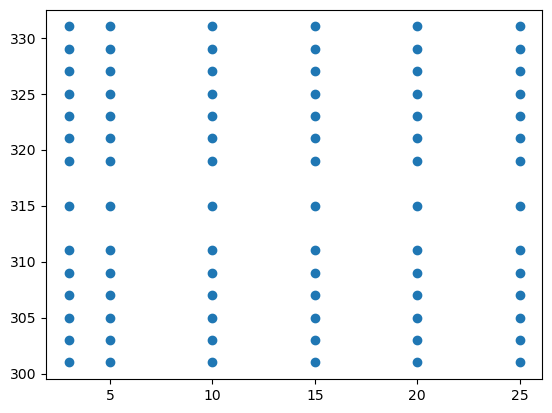

In [5]:
# Строим график зависимостей возраста от Seed
plt.scatter(data=df, x='age', y='Seed')

<AxesSubplot:>

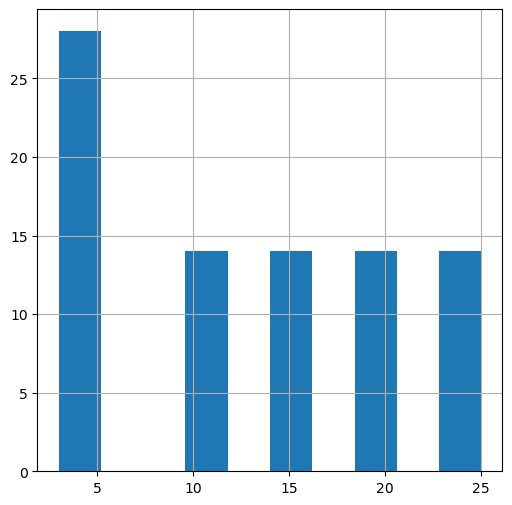

In [6]:
# Гистограмма возраста
df['age'].hist(figsize=(6, 6), bins=10)

<AxesSubplot:>

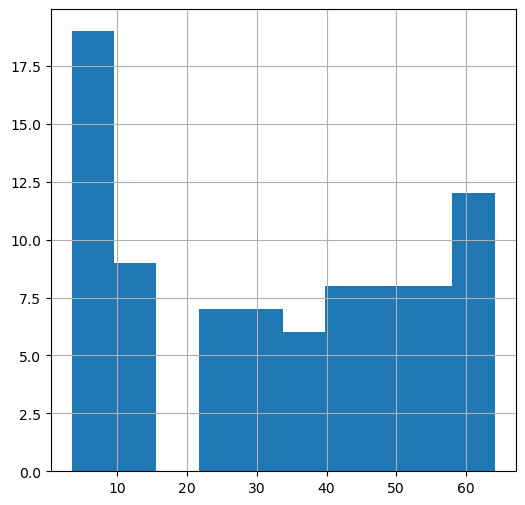

In [7]:
# Гистограмма высоты
df['height'].hist(figsize=(6, 6), bins=10)

<AxesSubplot:>

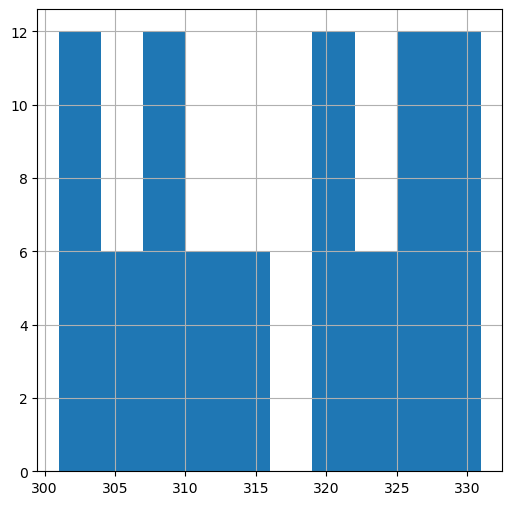

In [8]:
# Гистограмма Seed
df['Seed'].hist(figsize=(6, 6), bins=10)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'Seed'}>, <AxesSubplot:>]],
      dtype=object)

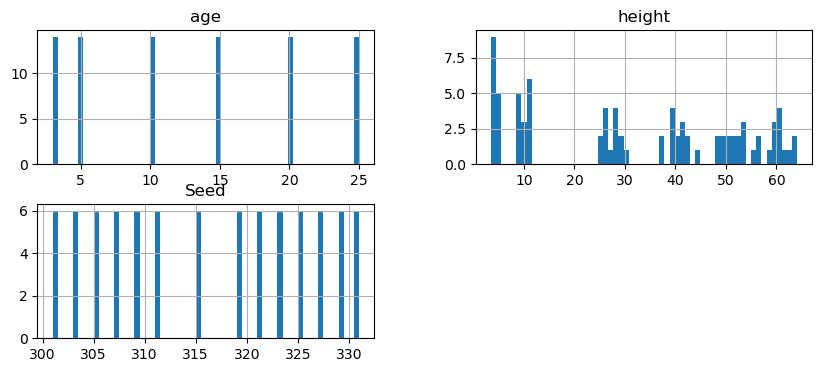

In [9]:
# Гистограммы параметров
features = ['age', 'height', 'Seed']
df[features].hist(figsize=(10, 4), bins=60)

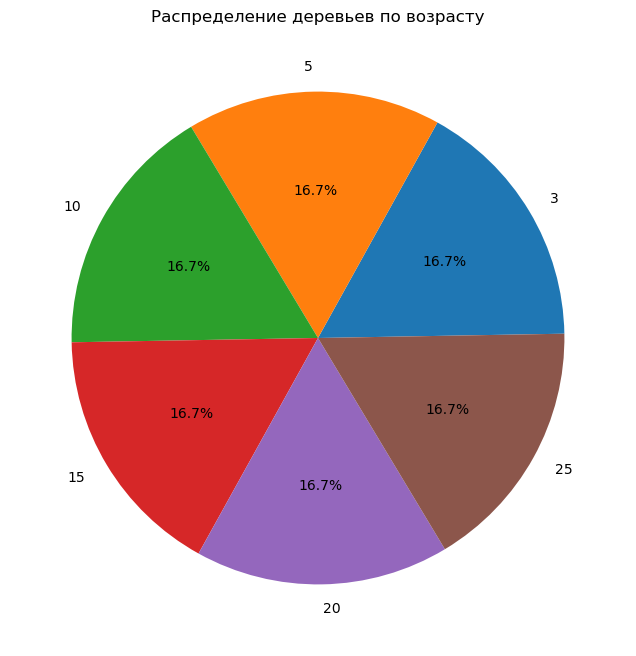

In [10]:
#Данные
data = Counter(df['age'])
labels = data.keys()
sizes = data.values()

#Круговая диаграмма
plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 1)
plt.title('Распределение деревьев по возрасту')
plt.show()

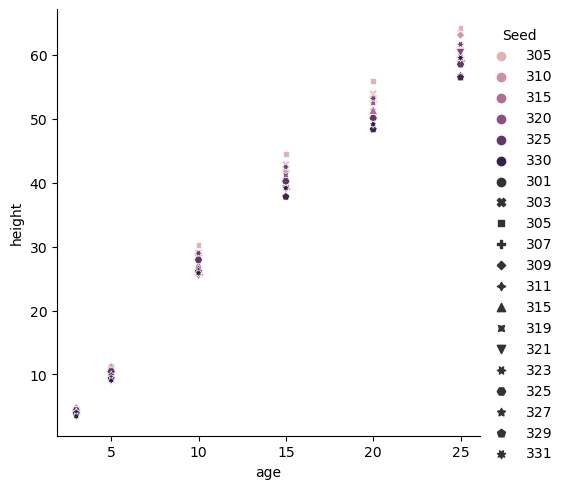

In [11]:
# Построим зависимость высоты (height) от возраста деревьев (age), при этом размер точки будет определяться упорядоченным фактором
sns.relplot(data=df, x='age', y='height', hue='Seed', style='Seed', sizes=(1000, 1000))
plt.show()

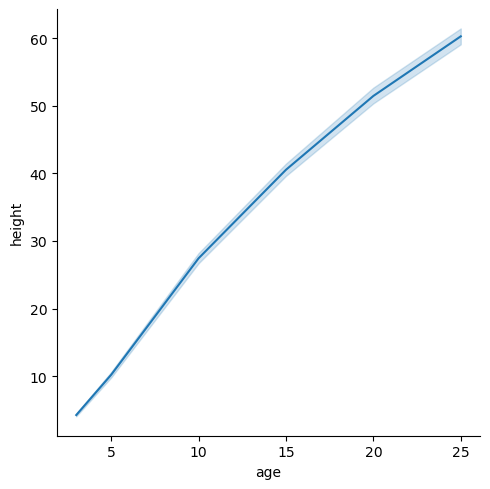

In [12]:
# Построим зависимость возраста (age) от высоты деревьев (height)
sns.relplot(x = 'age', y = 'height', kind = 'line', legend = 'full', data = df)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


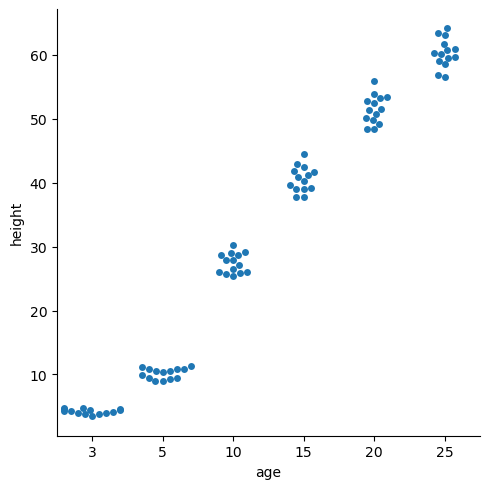

In [13]:
# Для визуализации набора данных через рой воспользуемся catplot
sns.catplot(x = 'age', y = 'height', kind = 'swarm', data = df)
plt.show()

<AxesSubplot:xlabel='Seed'>

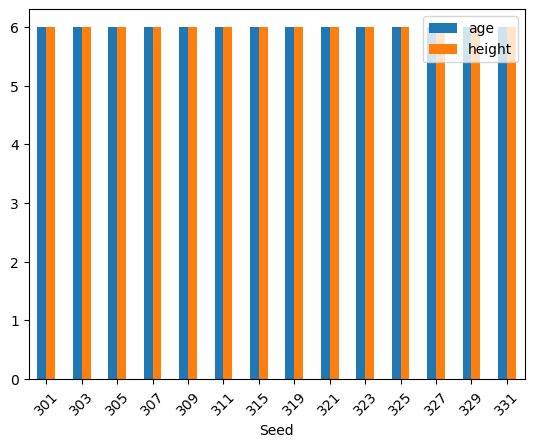

In [22]:
# Группируем по Seed и строим график, где rot это угол наклонна к оси x
df.groupby('Seed').count().plot(kind = 'bar', rot = 45)

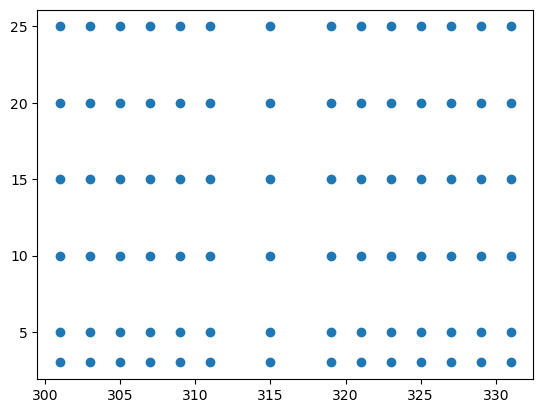

In [16]:
# Распределение возраста по Seed
plt.scatter([df.Seed], [df.age])
plt.show()

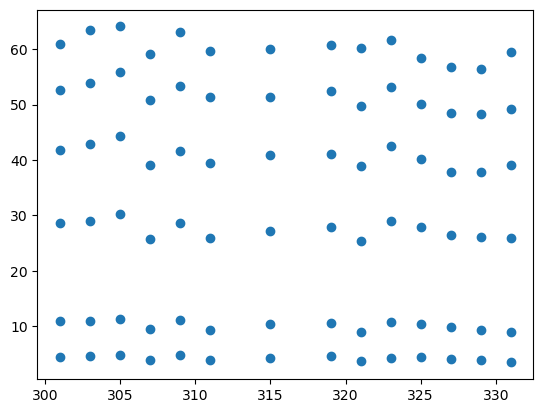

In [17]:
# Распределение высоты по Seed
plt.scatter([df.Seed], [df.height])
plt.show()

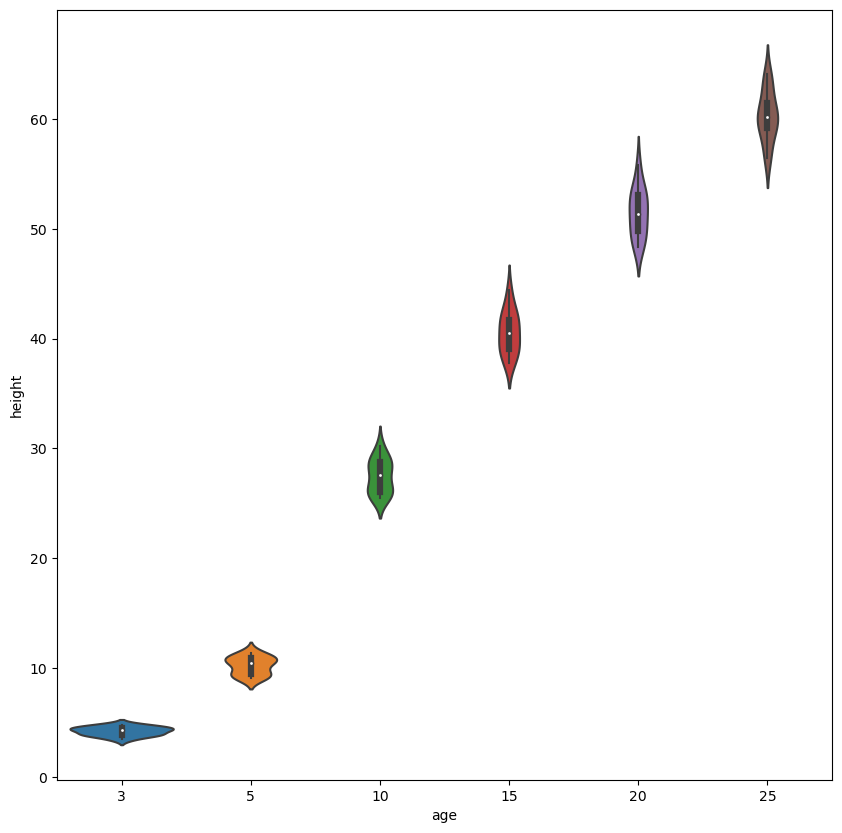

In [18]:
# Строим vionlinplot, похожий на boxplot. Он показывает плотность распределения данных
df = df[df['age'] != 'height']
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'age', y = 'height', data = df)
plt.show()

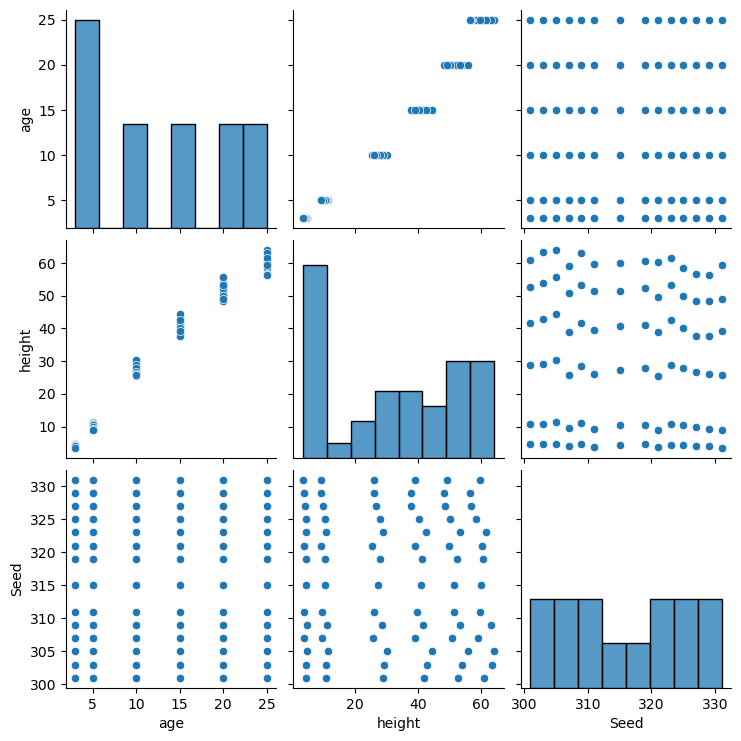

In [19]:
# Построим pairplot, на диагонали матрицы графиков расположены гистограммы распределений признака
# Остальные графики это scatter plots для соответствующих пар признаков
df = df[['age', 'height', 'Seed']]
sns.pairplot(df) 
plt.show()

<AxesSubplot:xlabel='age', ylabel='Seed'>

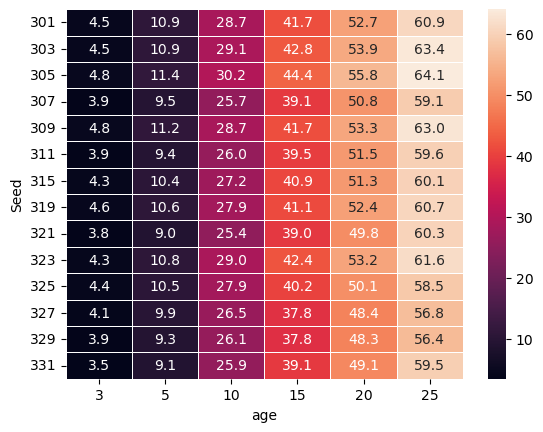

In [20]:
# Построим тепловую карту, где распределение веса показано по двум категориальным переменным
platform_genre_sales = df.pivot_table(
                        index = 'Seed', 
                        columns = 'age', 
                        values = 'height', 
                        aggfunc = sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot = True, fmt = '.1f', linewidths = .5)

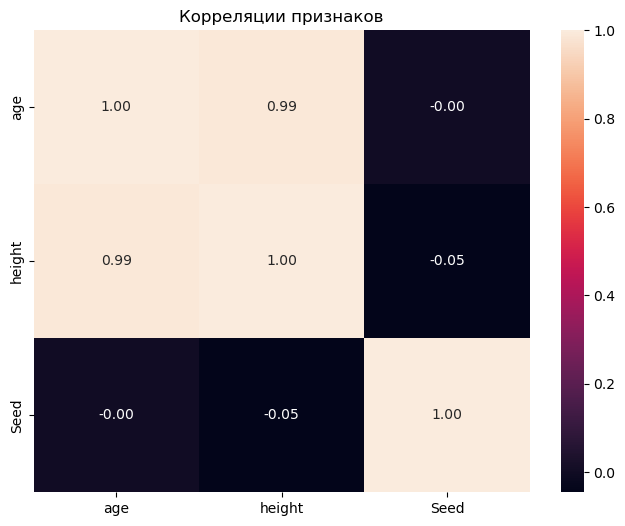

In [21]:
# Построим тепловую карту, где распределение парметров показано в зависимости друг от друга
#Данные
data = df.corr()

#Тепловая карта
plt.figure(figsize = (8,6))
sns.heatmap(data, annot = True, fmt = '.2f')
plt.title('Корреляции признаков')
plt.show()

## Вывод:
## 1 Были импортированы все необходимые библиотеки для визуализации данных.
## 2 Затем прочитан датасет сосны Loblolly, состоящий из возраста сосен в футах, веса в годах и упорядоченного фактора (указывает источник семян).
## 3 По relplot выяснили, что зависимость возраста от веса линейная и постоянно увеличивается, с учётом корреляции упорядоченый коэффициент возрастает. Линейное построение, так же показало, что корреляция увеличивается при возрастании признаков.
## 4 Catplot показал аналогичную зависимость.
## 5 Построенные violinplot и pairplot подтверждают зависимости веса и возраста, возрастание упорядоченного коэффициента.
## 6 Тепловая карта, показывающая рапсределение веса подтвердила зависимости и показала незначительную разницу между ближайшими значениями параметров.
## 7 Из тепловой карты, показывающей зависимости параметров друг от друга понятно, что зависимость приблизительно равна нулю, то есть практически линейная.

# Датасет оказался достаточно чистым, не имеющим пропущенных и аномальных значений, что показывает его пригодность для обработки и построения линейной регрессии.
# Исходя из предоставленных параметров можно узнать остальные и возможно предсказать предрасположенность сосен Loblolly к различным заболеваниям, то есть данный датасет понадобится для алгоритмов машинного обучения при условии добавления большого количества 'чистых' параметров с большим количеством значений.